## Main project

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langchain.tools import tool
from langgraph.prebuilt import create_react_agent
from dotenv import load_dotenv

load_dotenv()

@tool
def greeting(name: str) -> str:
    """ Useful for greeting a user """
    print("greeting tool has been called")          # letting user know this agent is being used
    return f"Hello {name}, Hope you are doing well"

@tool
def calculator(a: float, b: float) -> str:
    """ Useful for performing arithematic calculations with numbers """
    print("calculator tool has been called")        # letting user know this agent is being used
    return f"The sum of {a} and {b} is {a + b}"


def main():
    model = ChatOpenAI(temperature=0) # higher temperature means more random response from the model
    tools = [calculator, greeting]
    agent_executor = create_react_agent(model, tools) # using langgraph's pre-built agent to automatically decide how to use both models & tools

    print("Welcome! I'm your AI assistant. Type 'quit' to exit")
    print("You can ask me to perform calculations or chat with me")

    while True:
        user_input = input("\nYou: ").strip()

        if user_input == 'quit':
            print("Goodbye")
            break

        print("\nAssistant: ", end="")

        # for getting just the final ouput we can use - agent_executor.invoke() method
        final_state = agent_executor.invoke({"messages": [HumanMessage(content=user_input)]})
        if final_state and "messages" in final_state:
            print(final_state["messages"][-1].content) # Print the content of the last message


        ## streaming the output of agent we can use (agent_executor.stream() method)
        # for chunk in agent_executor.stream(
        #     {"messages": [HumanMessage(content=user_input)]}
        # ):
        #     # print(f"\n Current Chunk:- \n {chunk}")
        #     # print()
        #     if "agent" in chunk and "messages" in chunk["agent"]:
        #         for message in chunk["agent"]["messages"]:
        #             print(message.content, end="")
        # print()

if __name__=="__main__":
    main()

## Output:

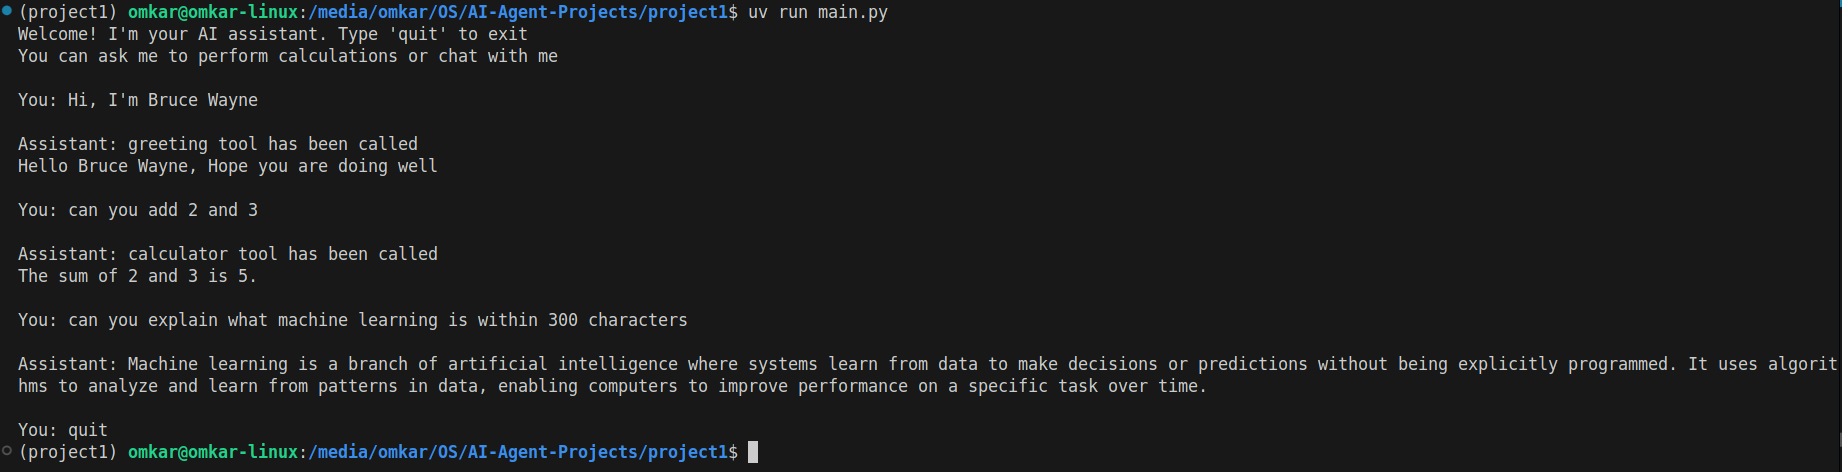